<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import statistics

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)

## Task 1 
####  Let's explore our dataset

Dataset variables:
*     CRIM - per capita crime rate by town
*     ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*     INDUS - proportion of non-retail business acres per town
*     CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*     NOX - nitric oxides concentration (parts per 10 million)
*     RM - average number of rooms per dwelling
*     AGE - proportion of owner-occupied units built prior to 1940
*     DIS - weighted distances to five Boston employment centres
*     RAD - index of accessibility to radial highways
*     TAX - full-value property-tax rate per $10,000
*     PTRATIO - pupil-teacher ratio by town
*     LSTAT - % lower status of the population     
*     MEDV - Median value of owner-occupied homes in $1000's      


In [5]:
# Display the first ten rows of boston_df DataFrame
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Check the data types and info


In [22]:
# Get the information about boston_df DataFrame
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


## Task 2
#### Descriptive Statistics and Visualizations

##### 2.1. Median value of owner-occupied homes

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64
Median    21.2
Mode    50.0


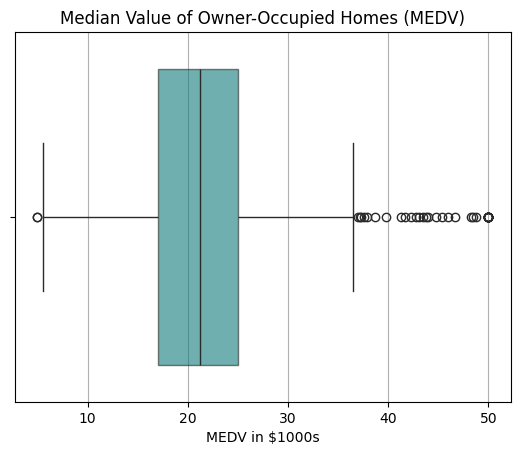

In [70]:
# Compute and print descriptive statistics of the column 'MEDV'
stat = boston_df['MEDV']
print(stat.describe())

# Compute and print the median of the column 'MEDV'
median_MEDV = statistics.median(boston_df['MEDV'])
print("Median   ",median_MEDV)

# Compute and print the mode of the column 'MEDV'
mode_MEDV = statistics.mode(boston_df['MEDV'])
print("Mode   ",mode_MEDV)

# Create a boxplot for the 'MEDV' column of the boston_df DataFrame with a dark cyan color and a box transparency of 0.6
ax = sns.boxplot(x='MEDV', data=boston_df, color='darkcyan', boxprops=dict(alpha=.6))
plt.title('Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV in $1000s')
ax.grid(axis='x')
plt.show()

In [45]:
# Calculate the percentage of outliers in the 'MEDV' column
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = boston_df['MEDV'].quantile(0.25)
Q3 = boston_df['MEDV'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate and print the percentage of outliers
outliers = boston_df[(boston_df['MEDV'] < lower_bound) | (boston_df['MEDV'] > upper_bound)]
outliers_percentage = (len(outliers) / len(boston_df['MEDV'])) * 100
print(f"Percentage of outliers in MEDV column: {outliers_percentage:.2f}%")

Percentage of outliers in MEDV column: 7.91%


###### __Conclusion:__ 
###### As observed from the boxplot and descriptive statistics, the 'MEDV' variable ranges from 5.0 to 50.0. 
###### Since the mean (22.5) and the median (21.2) are close in value, the middle value of the dataset, when arranged in ascending order, closely resembles the balancing point in the data, which occurs at the average. We can conclude that the dataset has a quite symmetrical distribution with a slight positive skew. 
###### The boxplot suggests that the dataset is normally distributed, with 7.91% of outliers in the dependent variable (MEDV)e. However, it is not advisable to ignore them initially unless they appear to be illogical or nonsensical 
###### As we can see, the boxplot for the MEDV variable displays a small Interquartile Range (IQR), suggesting that the central data points are close together and, therefore, more consistent..

##### 2.2. Charles river variable (1 - tract bounds river; 0 - otherwise)

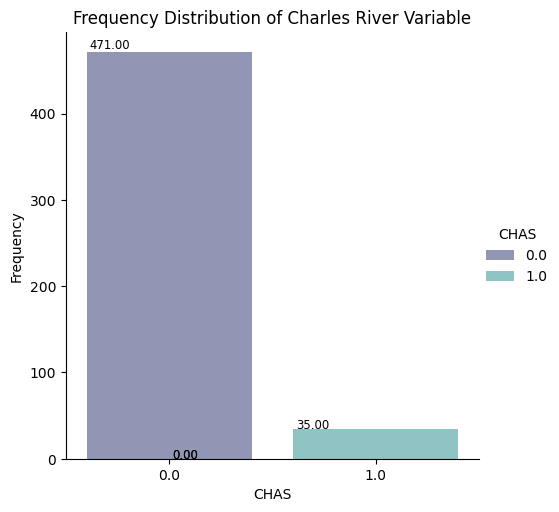

In [71]:
# Create a bar plot for the 'CHAS' column of the boston_df DataFrame with the 'mako' color palette and a transparency of 0.6.
ax = sns.catplot(x='CHAS',kind='count', hue = 'CHAS', data=boston_df, palette="mako", alpha=0.6)

# Add a value labels on the top of bars
ax = ax.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.01, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title('Frequency Distribution of Charles River Variable')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()

In [47]:
 Count and print the number of data points with 'CHAS' value as 1
bound_by_river = boston_df[boston_df['CHAS'] == 1]['CHAS'].count()

# Count and print the number of data points with 'CHAS' value as 0
not_bound_by_river = boston_df[boston_df['CHAS'] == 0]['CHAS'].count()

print(f"Bound by river: {bound_by_river}")
print(f"Not bound by river: {not_bound_by_river}")

Bound by river: 35
Not bound by river: 471


###### __Conclusion:__ 
###### Out of all the data points in the 'CHAS' column, 35 are bound by the river, while 471 have a value of 0, indicating otherwise.

##### 2.3. MEDV variable vs the AGE variable

In [49]:
# Create a new column 'age_group' with the age group categories for the boston_df DataFrame.
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '< 35 years'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '35-70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '> 70 years'

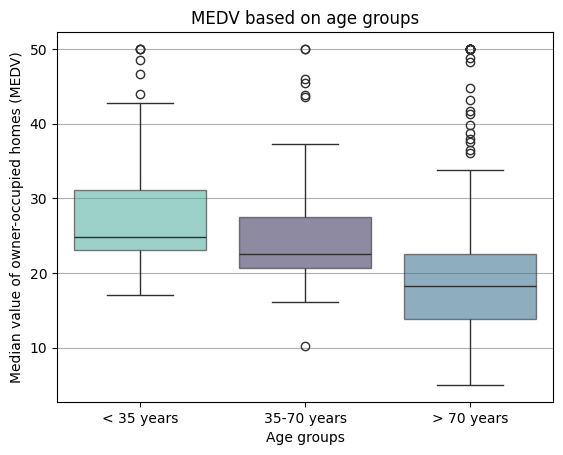

In [50]:
# Create a boxplot for the 'MEDV' values of the boston_df DataFrame grouped by the 'age_group' column. The boxplot will be colored by age group using the 'mako' color palette and will have a transparency of 0.6.
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, hue='age_group', palette="mako", order=["< 35 years", "35-70 years", "> 70 years"], boxprops=dict(alpha=.6))
plt.title('MEDV based on age groups')
plt.xlabel('Age groups')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
ax.grid(axis='y')
plt.show()

In [52]:
# Compute and print the descriptive statistics for the 'MEDV' values in each age group.
df2=boston_df.groupby(['age_group'])['MEDV'].describe()
print(df2)

             count       mean       std   min     25%   50%     75%   max
age_group                                                                
35-70 years  128.0  24.947656  6.969370  10.2  20.675  22.6  27.425  50.0
< 35 years    91.0  27.775824  7.638198  17.1  23.050  24.8  31.150  50.0
> 70 years   287.0  19.793380  9.515375   5.0  13.800  18.2  22.550  50.0


###### __Conclusion:__ 
###### From the boxplots and described statistics, we can observe that the highest mean (27.78) median value of owner-occupied homes (MEDV) is for the age group below 35 years, followed by the age group from 35 to 70 years (24.95). For the age group over 70 years, the mean median value of owner-occupied homes (MEDV) shows the lowest value (19.79).
###### Although the highest value for all three age groups is the same (50), the lowest value differs. The smallest value (5) is for the age group over 70 years, while the highest lowest value is for the age group up to 35 years with a value of 17.1.
###### Attention should be drawn to the fact that the number of observations varies significantly among the age groups.

##### 2.4. Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

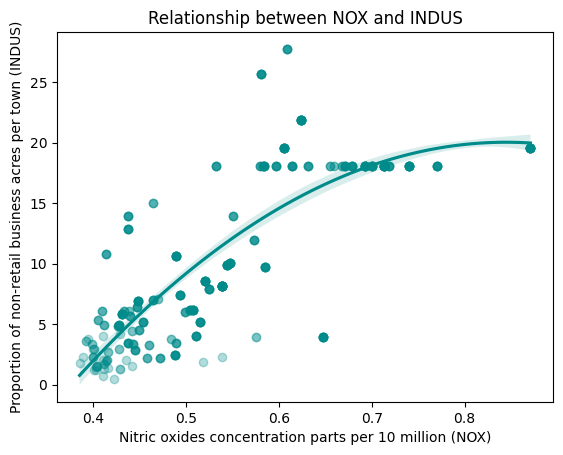

In [62]:
# Create a regression plot between 'NOX' and 'INDUS' with a polynomial regression line of order 2 and scatter plot points having an alpha (opacity) of 0.3 
ax = sns.regplot(x='NOX', y='INDUS', data=boston_df, color='darkcyan', order=2, scatter_kws={'alpha':0.3})
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric oxides concentration parts per 10 million (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.show()

In [101]:
# Calculate Pearson correlation coefficient and p-value for testing non-correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

###### __Conclusion:__ 
###### The scatterplot and calculated Pearson correlation coefficient and p-value, illustrate a strong positive non-linear correlation between Nitric Oxide Concentration (NOX) and the Proportion of non-retail business acres per town (INDUS) with a Pearson correlation coefficient of approximately 0.764. The correlation appears more linear and is strongest in the lower left portion of the plot, becoming nonlinear on the right side. 
###### An interesting phenomenon is that NOX levels continue to rise even as INDUS values plateau around 18.
###### The p-value is very close to zero (p < 0.05), indicating that this correlation is statistically significant.

##### 2.5. Pupil to teacher ratio 

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64
Median    19.05
Mode    20.2


[Text(0.5, 1.0, 'The Pupil to Teacher Ratio Variable (PTRATIO)'), None]

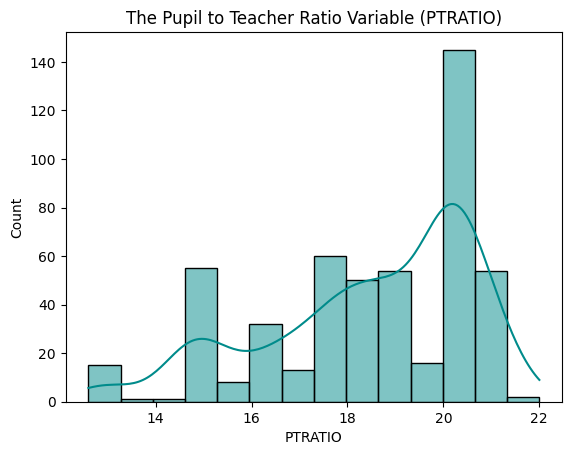

In [72]:
# Compute and print the descriptive statistics for the 'PTRATIO' column.
stat = boston_df['PTRATIO']
print(stat.describe())

# Compute and print the median of the column 'PTRATIO'
median_PTRATIO = statistics.median(boston_df['PTRATIO'])
print("Median   ",median_PTRATIO)

# Compute and print the mode of the column 'PTRATIO'
mode_PTRATIO = statistics.mode(boston_df['PTRATIO'])
print("Mode   ",mode_PTRATIO)

# Create a histogram with a Kernel Density Estimate (KDE) for the 'PTRATIO' variable 
sns.histplot(data=boston_df, x="PTRATIO", color='darkcyan', kde=True).set(title='The Pupil to Teacher Ratio Variable (PTRATIO)', alpha = 0.6)

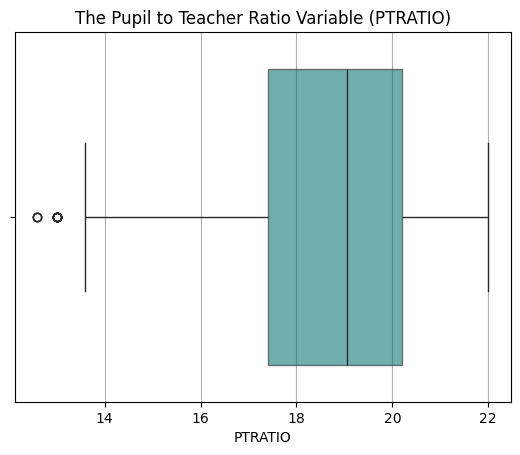

In [73]:
# Create a boxplot for the 'PTRATIO' values in the boston_df DataFrame with the specified color and transparency
ax = sns.boxplot(x='PTRATIO', data=boston_df, color='darkcyan', boxprops=dict(alpha=.6))
plt.title('The Pupil to Teacher Ratio Variable (PTRATIO)')
plt.xlabel('PTRATIO')
ax.grid(axis='x')
plt.show()


###### __Conclusion:__ 
###### Based on the boxplot and histogram plot, we can observe that the Pupil to Teacher Ratio (PTRATIO) variable is left-skewed. In this variable, the order of central tendencies is as follows: mode (20.02) > median (19.05) > mean (18.46).###### The most frequently occurring value in the dataset is 20.2 (mode).5.

## Task 3
#### Use of the statistical tests

##### 3.1. Is there a significant difference in the median value of houses bounded by the Charles River or not? (T-test for independent samples)

##### State the hypothesis:* There is no significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river.
* There is a significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the riverrot.")

In [82]:
# Extracting MEDV values for houses bounded and not bounded by Charles river 
medv_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Performing Levene's test (argument specifies that the test should use the mean as the center of the data)
statistic, p_value = levene(medv_bounded, medv_not_bounded, center='mean')

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The variances are equal (fail to reject the null hypothesis).")
else:
    print("The variances are not equal (reject the null hypothesis).")



Statistic: 8.75190489604598
P-value: 0.003238119367639829
The variances are not equal (reject the null hypothesis).


In [83]:
# Extracting MEDV values for houses bounded and not bounded by Charles river
medv_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Performing Levene's test (argument specifies that the test should use the median as the center of the data)
statistic, p_value = levene(medv_bounded, medv_not_bounded, center='median')

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("The variances are equal (fail to reject the null hypothesis).")
else:
    print("The variances are not equal (reject the null hypothesis).")


Statistic: 4.590342218715871
P-value: 0.03263097600633006
The variances are not equal (reject the null hypothesis).


In [104]:
# Extracting MEDV values for houses bounded and not bounded by Charles river
medv_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test for independent samples
t_statistic, p_value = ttest_ind(medv_bounded, medv_not_bounded, equal_var=True)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river.")
else:
    print("There is a significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river.


###### __Conclusion:__ 
###### Since the p-value is less than the alpha value of 0.05, we reject the null hypothesis. This suggests that there is a statistically significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the river.

##### 3.2. Is there a difference in Median Values of Houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

##### State the hypothesis:
* There is no difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940.
* There is a significant difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940.

In [115]:
# Filter the 'MEDV' values based on the defined age_group categories
less_35 = boston_df[boston_df['age_group'] == '< 35 years']['MEDV']
between_35_70 = boston_df[boston_df['age_group'] == '35-70 years']['MEDV']
greater_70 = boston_df[boston_df['age_group'] == '> 70 years']['MEDV']

In [116]:
# Perform Levene's test
levene_statistic, p_value = levene(less_35, between_35_70, greater_70, center='mean')

print(f"Levene's Statistic: {levene_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Equal variances across the groups (fail to reject H0).")
else:
    print("Unequal variances across the groups (reject H0).")

Levene's Statistic: 2.7806200293748304
P-value: 0.06295337343259205
Equal variances across the groups (fail to reject H0).


In [117]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(less_35, between_35_70, greater_70)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference in the means of the groups (fail to reject H0).")
else:
    print("There is a significant difference in the means of the groups (reject H0).")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a significant difference in the means of the groups (reject H0).


###### __Conclusion:__ 
###### Levene's Test: The p-value is 0.06295, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no significant difference in variances across the age groups.
###### One-way ANOVA Test: The p-value is extremely small (close to zero and much less than 0.05). Therefore, we reject the null hypothesis, indicating that there is a significant difference in the means of the median values of houses (MEDV) across the age groups.
###### There is a significant difference in the median values of houses (MEDV) for each proportion of owner-occupied units built before 1940 across the age groups.


##### 3.3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

##### State the hypothesis:
* There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
* There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [118]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [120]:
# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("There is no significant correlation between NOX and INDUS.")
else:
    print("There is a significant correlation between NOX and INDUS.")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant correlation between NOX and INDUS.


###### __Conclusion:__ 
###### The Pearson correlation coefficient between NOX and INDUS is approximately 0.7637, indicating a strong positive linear relationship between the two variables.
###### The p-value is extremely small (much less than the common significance level of 0.05).
###### Therefore, we can conclude that there is a significant positive correlation between Nitric Oxide Concentration (NOX) and the Proportion of non-retail business acres per town (INDUS).

##### 3.4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

##### State the hypothesis:
* The weighted distance to the five Boston employment centres (DIS) has no impact on the median value of owner occupied homes (MEDV)
* The weighted distance to the five Boston employment centres (DIS) has significant impact on the median value of owner occupied homes (MEDV)

In [124]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Adds a constant (intercept) to the model
X = sm.add_constant(X) 

# Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        20:18:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

###### __Conclusion:__ 
###### The p-value for the DIS variable is less than 0.05 (P>|t| = 0.000), which means the weighted distance to the Boston employment centers (DIS) has a significant effect on the median value of owner-occupied homes (MEDV).
###### The DIS coefficient (1.0916) suggests that as the weighted distance to employment centers increases by one unit, the median value of owner-occupied homes is expected to increase by approximately 1.0916 units, holding other variables constant.